## LeNet'98

Особенности LeNet5:

- Свёрточная нейросеть, использующая последовательность из трёх слоёв: слои свёртки (convolution), слои группирования (pooling) и слои нелинейности (non-linearity) –> с момента публикации работы Лекуна это, пожалуй, одна из главных особенностей глубокого обучения применительно к изображениям.
- Подвыборка с использованием усреднения карт.
- Нелинейность в виде гиперболического тангенса или сигмоид.
- Финальный классификатор в виде многослойной нейросети.

<img src='https://drive.google.com/uc?exoprt=view&id=1pPe1aBh7ySg89cxbWEZ07iabvvXABUxd'>

Многие предобученные модели обучались на датасете ImageNet, который содержит 14,197,122 картинок - это набор данных размечанных изображений с высоким разрешением, относящихся примерно к 22 тысячам категорий. Проводился «Крупномасштабный конкурс визуального распознавания ImageNet» (ILSVRC2013). ILSVRC использует подмножество ImageNet из примерно 1000 изображений в каждой из 1000 категорий.

<img src='https://avatars.mds.yandex.net/get-zen_doc/127510/pub_5c33ad37c906e200abbace3b_5c33adfbe5e73b00aad095a1/scale_1200'>

## AlexNet'12

В AlexNet результаты вычислений LeNet масштабированы в гораздо более крупную нейросеть, которая способна изучить намного более сложные объекты и их иерархии. Особенности:

- Использование блоков ReLU в качестве нелинейностей.
- Использование max pooling, что позволяет избежать эффектов усреднения average pooling.

На вход идут картинки 224х224, естественно не все картинки такого размера, поэтому будет достаточно просто сжать их до нужного размера.

<img src='https://drive.google.com/uc?export=view&id=1sjEftFGiJ50-m3VevamktVznsx6bY3Yw' width=700>

## VGG'14
В разработанных в Оксфорде VGG-сетях в каждом свёрточном слое впервые применили фильтры 3х3 и объединили эти слои в последовательности свёрток.

Вместо применяемых в AlexNet фильтров 9х9 и 11х11 стали применять гораздо более мелкие фильтры, которых старались избежать авторы LeNet. Но большим преимуществом VGG стала находка, что несколько свёрток 3х3, объединённых в последовательность, могут эмулировать более крупные свертки, например, 5х5 или 7х7.

Каскад из двух сверток 3х3 равен свертке 5х5, но с меньшим количеством параметров.
(5х5 = 25 + 1 = 26; 3x3 + 3x3 + 2 = 20)

<img src='https://drive.google.com/uc?export=view&id=1GvrtEDocJ3xp9RKqgQu0-JnyTssqZhzV'>

Глубокие сверточные нейронные сети превзошли человеческий уровень классификации изображений в 2015 году. Глубокие сети извлекают низко-, средне- и высокоуровневые признаки  сквозным многослойным способом, а увеличение количества слоев обогатить «уровни» признаков. Но у глубоких нейронных сетей была проблема: затухающие градиенты. Особенно это явно чувствуется с сигмоидой.

$d\sigma = \sigma(1 - \sigma) \leqslant \frac{1}{4}$

<img src='https://drive.google.com/uc?export=view&id=171JbyNkSSqzhPdX4fp439zOouEzJmq_s'>

## GoogLeNet

Эта сеть использует Inception блоки. Это параллельная комбинация свёрточных фильтров 1х1, 3х3 и 5х5. Но главная особенность заключается в использовании свёрточных блоков 1х1 для уменьшения количества каналов перед подачей в более «дорогие» сверточные блоки. Обычно эту часть называют bottleneck. Вместо использования свертки 5х5 на нашем изображении, можем сначала пройтись сверткой 1х1 уменьшив количество каналов, а затем по ним пройтись сверткой 5х5, вернув количество каналов. Операций будет меньше, а результат будет одинаковый.

<img src='https://drive.google.com/uc?export=view&id=1hgoTi6d-pdRPHgnfVGssQIQXBUdrkWrk'>

In [1]:
!pip install torchsummary 

In [2]:
import torch
from torch import nn
from torchsummary import summary

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
model = nn.Sequential(
    nn.Conv2d(in_channels=256,
              out_channels=256,
              kernel_size=5)
)

summary(model.to(device), input_size=(256, 16, 16))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 256, 12, 12]       1,638,656
Total params: 1,638,656
Trainable params: 1,638,656
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.25
Forward/backward pass size (MB): 0.28
Params size (MB): 6.25
Estimated Total Size (MB): 6.78
----------------------------------------------------------------


In [4]:
model = nn.Sequential(
    nn.Conv2d(in_channels=256,
              out_channels=128,
              kernel_size=1),
    nn.Conv2d(in_channels=128,
              out_channels=256,
              kernel_size=5)
)

summary(model.to(device), input_size=(256, 16, 16))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 16, 16]          32,896
            Conv2d-2          [-1, 256, 12, 12]         819,456
Total params: 852,352
Trainable params: 852,352
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.25
Forward/backward pass size (MB): 0.53
Params size (MB): 3.25
Estimated Total Size (MB): 4.03
----------------------------------------------------------------


Разработчики этой сети придумали способ, чтобы градиенты не затухали: вводится несколько вспомогательных функций на протяжении всей сети, чтобы когда градиент от первого выхода начинал затухать, подключался градиент со второго выхода.

<img src='https://drive.google.com/uc?export=view&id=1q3oJXpwGStYit5Ii13DIsexVqxwIjyjE'>

## ResNet'15

До этого боролись с затухающими градиентами только за счет ввода другой функции активации.

Чтобы преодолеть проблему затухающих градиентов, Microsoft ввела глубокую «остаточную» структуру обучения.

<img src='https://drive.google.com/uc?export=view&id=1RGJQl4-SmysYbAqwcy8Lm5qEPbiebZOO'>

Смысл:

$y = f(x) + x $<br>
$dy = df(x) + 1 $<br>
<h3>$\frac{dL}{dx} = \frac{dL}{dy} \frac{dy}{dx} = \frac{dL}{dy}(df(x) + 1 )$</h3><br>

То есть градиенты всё равно будут протекать дальше в немного измененном виде.


Соединения быстрого доступа (shortcut connections, residual connections) пропускают один или несколько слоев и выполняют сопоставление идентификаторов.

<img src='https://drive.google.com/uc?export=view&id=1JcQDIjA-97L2xs3o-JD4SWBld9J0OMW-'>

Еще одна особенность ResNet, что в конце отсутствуют полносвязные слои, причина в том, что имеется уже и так довольно сложная нейронная сеть, в которой уже и так могла решиться задача, которая обычна перекладывается на полносвязный слой.

In [5]:
from torchvision import models, transforms, datasets
import torch
from torch import nn
import matplotlib.pyplot as plt

<img src='https://drive.google.com/uc?export=view&id=1qqbZ6iWZaD6LMjuIJ85mBGYpBwi0w-HL'>

In [6]:
train_data_path = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/'

Определим трансформации для тестового и обучающего датасета.



In [7]:
train_transforms = transforms.Compose([
    transforms.Resize(224),
#     transforms.RandomAffine(degrees=5, scale=(0.3, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

Загрузим датасет и поделим его на обучение и валидацию.



In [8]:
%%time
train_dataset = datasets.ImageFolder(train_data_path, transform=train_transforms)

CPU times: user 944 ms, sys: 1.13 s, total: 2.07 s
Wall time: 59.1 s


In [9]:
%%time
val_dataset = datasets.ImageFolder(train_data_path, transform=test_transforms)

CPU times: user 880 ms, sys: 747 ms, total: 1.63 s
Wall time: 12.2 s


In [10]:
torch.manual_seed(1)
# num_train_samples = len(train_dataset)
num_train_samples = 20000

val_split = 0.2
split = int(num_train_samples * val_split)
indices = torch.randperm(num_train_samples)


train_subset = torch.utils.data.Subset(train_dataset, indices[split:])
val_subset = torch.utils.data.Subset(val_dataset, indices[:split])

len(train_subset), len(val_subset)

(16000, 4000)

In [11]:
batch_size = 32

train_dataloader = torch.utils.data.DataLoader(
    dataset=train_subset, 
    batch_size=batch_size,
    shuffle=True
)

val_dataloader = torch.utils.data.DataLoader(
    dataset=val_subset,
    batch_size=batch_size,
    shuffle=False
)

In [12]:
classes = train_dataloader.dataset.dataset.classes

Можем проверить, как работает dataloader.

torch.Size([32, 3, 224, 224]) torch.Size([32])
Ground Truth B


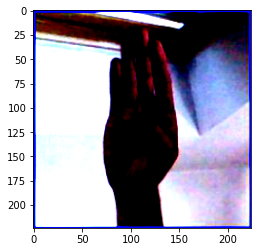

In [13]:
for img, label in train_dataloader:
    print(img.shape, label.shape)
    print(f'Ground Truth {classes[label[0]]}')
    plt.imshow(img[0].permute(1, 2, 0))
    break

In [14]:
resnet = models.resnet50(pretrained=True)
summary(resnet.to(device), input_size=(3, 224, 224))

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

Заморозим претренерованные слои, чтобы они не обучались.



In [15]:
for param in resnet.parameters():
    param.requires_grad = False

In [16]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [17]:
in_features = resnet.fc.in_features
fc = nn.Linear(in_features=in_features, out_features=len(classes))
resnet.fc = fc

summary(resnet.to(device), input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

Зададим функцию потерь и оптимизатор.

In [18]:
params_to_update = []
for name, param in resnet.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)

        
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params_to_update, lr=0.001)

Обучаем модель.

In [19]:
from time import time
from tqdm import tqdm


def train(model,
          criterion,
          optimizer,
          train_dataloader,
          test_dataloader,
          print_every,
          num_epoch):
    steps = 0
    train_losses, val_losses = [], []

    model.to(device)
    for epoch in tqdm(range(num_epoch)):
        running_loss = 0
        correct_train = 0
        total_train = 0
        start_time = time()
        iter_time = time()
        
        model.train()
        for i, (images, labels) in enumerate(train_dataloader):
            steps += 1
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            output = model(images)
            loss = criterion(output, labels)

            correct_train += (torch.max(output, dim=1)[1] == labels).sum()
            total_train += labels.size(0)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Logging
            if steps % print_every == 0:
                print(f'Epoch [{epoch + 1}]/[{num_epoch}]. Batch [{i + 1}]/[{len(train_dataloader)}].', end=' ')
                print(f'Train loss {running_loss / steps:.3f}.', end=' ')
                print(f'Train acc {correct_train / total_train * 100:.3f}.', end=' ')
                with torch.no_grad():
                    model.eval()
                    correct_val, total_val = 0, 0
                    val_loss = 0
                    for images, labels in test_dataloader:
                        images = images.to(device)
                        labels = labels.to(device)
                        output = model(images)
                        loss = criterion(output, labels)
                        val_loss += loss.item()

                        correct_val += (torch.max(output, dim=1)[1] == labels).sum()
                        total_val += labels.size(0)

                print(f'Val loss {val_loss / len(test_dataloader):.3f}. Val acc {correct_val / total_val * 100:.3f}.', end=' ')
                print(f'Took {time() - iter_time:.3f} seconds')
                iter_time = time()

                train_losses.append(running_loss / total_train)
                val_losses.append(val_loss / total_val)


        print(f'Epoch took {time() - start_time}') 
        torch.save(model, f'checkpoint_{correct_val / total_val * 100:.2f}')
        
    return model, train_losses, val_losses

In [20]:
print_every = 50
num_epoch = 2

resnet, train_losses, val_losses = train(
    model=resnet,
    criterion=criterion,
    optimizer=optimizer,
    train_dataloader=train_dataloader,
    test_dataloader=val_dataloader,
    print_every=print_every,
    num_epoch=num_epoch
)

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch [1]/[2]. Batch [50]/[500]. Train loss 1.449. Train acc 54.188. Val loss 0.912. Val acc 74.800. Took 41.560 seconds
Epoch [1]/[2]. Batch [100]/[500]. Train loss 1.053. Train acc 71.562. Val loss 0.555. Val acc 88.775. Took 30.687 seconds
Epoch [1]/[2]. Batch [150]/[500]. Train loss 0.853. Train acc 78.688. Val loss 0.384. Val acc 93.950. Took 30.294 seconds
Epoch [1]/[2]. Batch [200]/[500]. Train loss 0.725. Train acc 82.609. Val loss 0.334. Val acc 93.750. Took 29.652 seconds
Epoch [1]/[2]. Batch [250]/[500]. Train loss 0.640. Train acc 85.075. Val loss 0.263. Val acc 95.550. Took 29.934 seconds
Epoch [1]/[2]. Batch [300]/[500]. Train loss 0.572. Train acc 87.021. Val loss 0.254. Val acc 94.175. Took 29.853 seconds
Epoch [1]/[2]. Batch [350]/[500]. Train loss 0.518. Train acc 88.393. Val loss 0.196. Val acc 96.800. Took 29.974 seconds
Epoch [1]/[2]. Batch [400]/[500]. Train loss 0.477. Train acc 89.430. Val loss 0.208. Val acc 95.550. Took 29.859 seconds
Epoch [1]/[2]. Batch [450

 50%|█████     | 1/2 [05:11<05:11, 311.65s/it]

Val loss 0.147. Val acc 97.500. Took 29.798 seconds
Epoch took 311.47043895721436
Epoch [2]/[2]. Batch [50]/[500]. Train loss 0.014. Train acc 97.437. Val loss 0.153. Val acc 96.600. Took 25.647 seconds
Epoch [2]/[2]. Batch [100]/[500]. Train loss 0.024. Train acc 97.187. Val loss 0.140. Val acc 97.400. Took 25.560 seconds
Epoch [2]/[2]. Batch [150]/[500]. Train loss 0.032. Train acc 97.271. Val loss 0.117. Val acc 97.900. Took 25.627 seconds
Epoch [2]/[2]. Batch [200]/[500]. Train loss 0.038. Train acc 97.344. Val loss 0.117. Val acc 97.750. Took 25.855 seconds
Epoch [2]/[2]. Batch [250]/[500]. Train loss 0.043. Train acc 97.425. Val loss 0.104. Val acc 98.300. Took 25.977 seconds
Epoch [2]/[2]. Batch [300]/[500]. Train loss 0.047. Train acc 97.573. Val loss 0.100. Val acc 97.975. Took 25.981 seconds
Epoch [2]/[2]. Batch [350]/[500]. Train loss 0.050. Train acc 97.598. Val loss 0.113. Val acc 97.225. Took 25.767 seconds
Epoch [2]/[2]. Batch [400]/[500]. Train loss 0.052. Train acc 97.

100%|██████████| 2/2 [09:30<00:00, 285.03s/it]

Val loss 0.081. Val acc 98.725. Took 25.771 seconds
Epoch took 258.237966299057


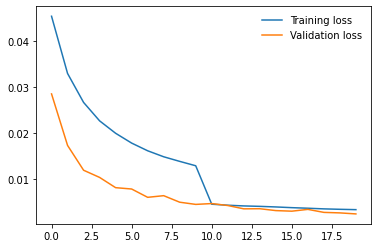

In [21]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

Инференс

In [22]:
from pathlib import Path
from PIL import Image


test_data_path = Path('../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/')


class ASLTestDataset(torch.utils.data.Dataset):
    def __init__(self, root_path, transforms=None):
        super().__init__()
        
        self.transforms = transforms
        self.imgs = sorted(list(Path(root_path).glob('*.jpg')))
        
    def __len__(self):
        return len(self.imgs)
    
    def __getitem__(self, idx):
        img_path = self.imgs[idx]
        img = Image.open(img_path).convert('RGB')
        
        label = img_path.parts[-1].split('_')[0]
        if self.transforms:
            img = self.transforms(img)
        
        return img, label

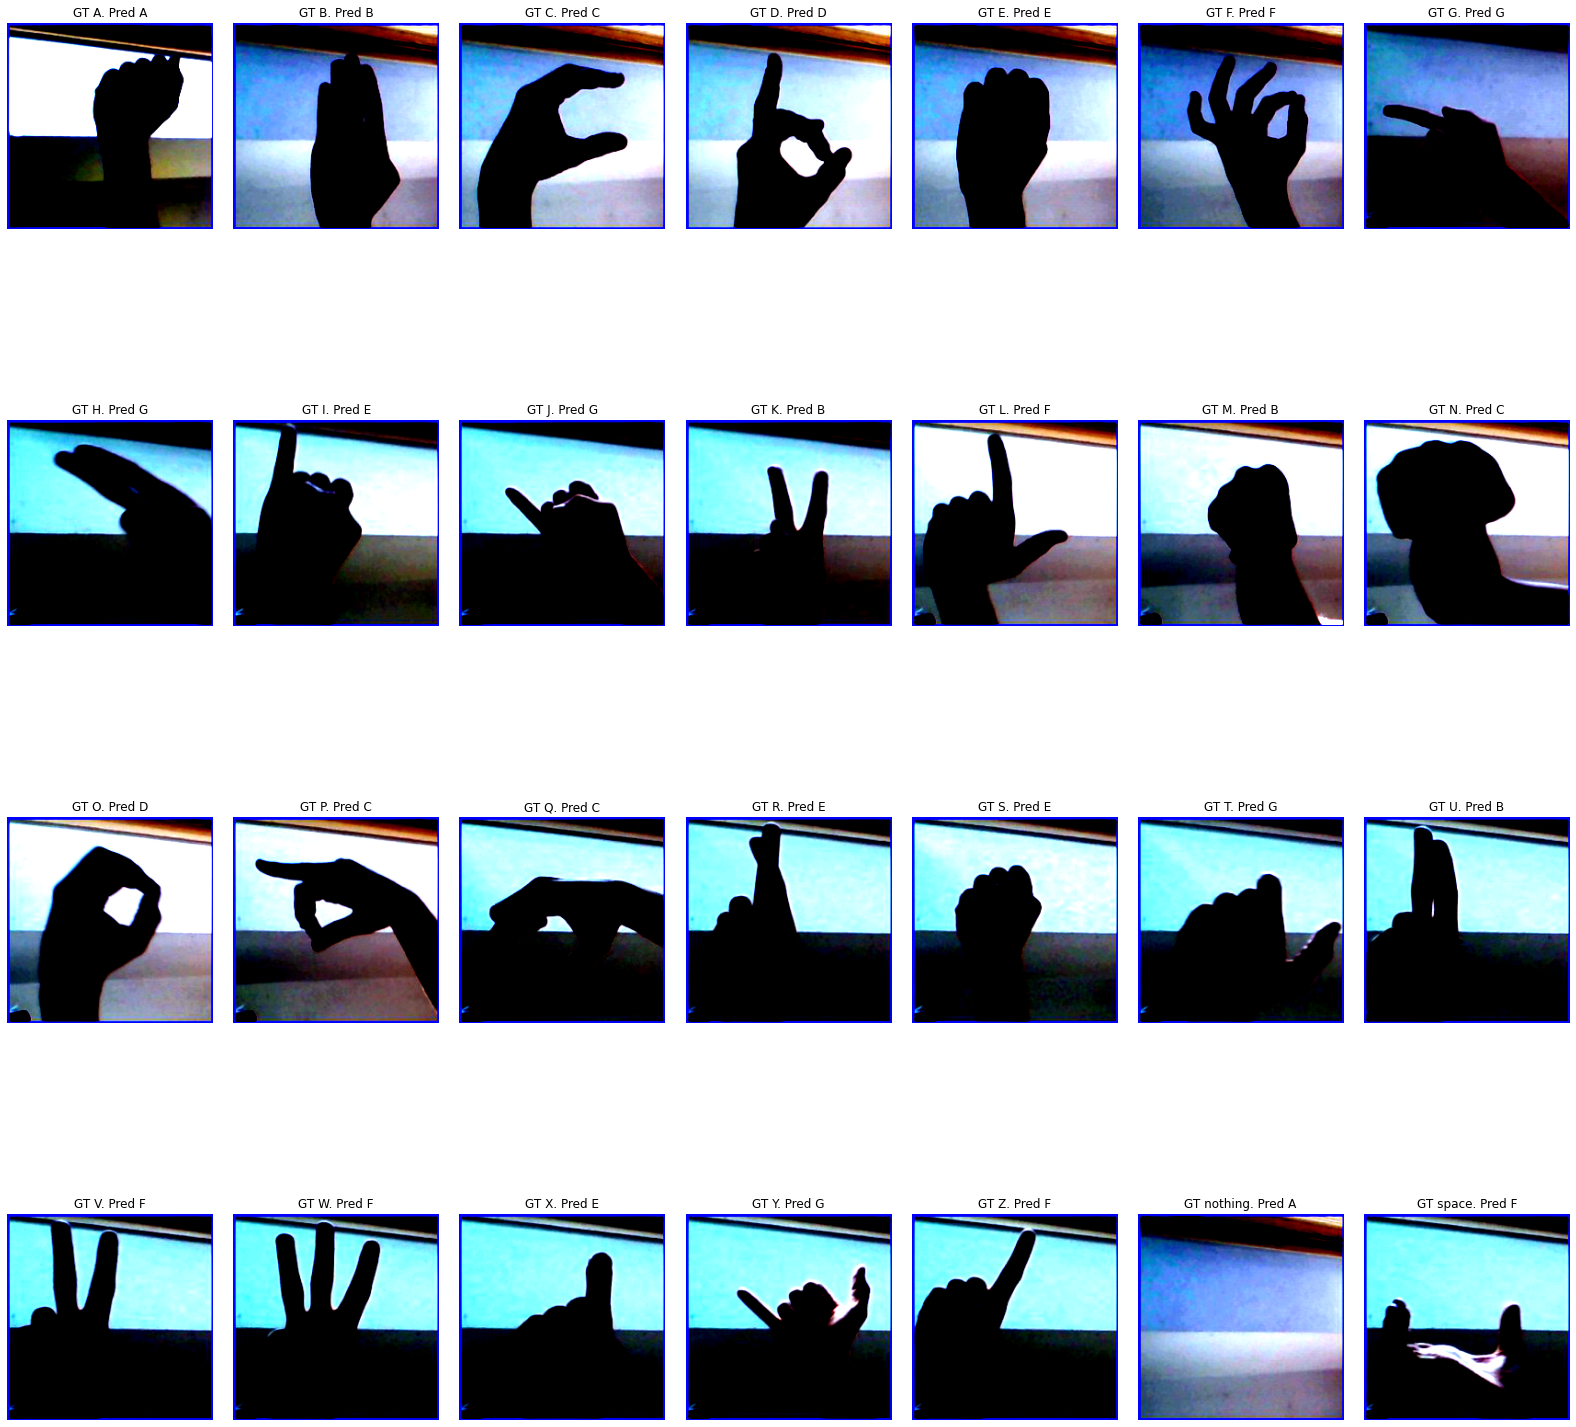

In [23]:
test_dataset = ASLTestDataset(test_data_path, transforms=test_transforms)

columns = 7
row = round(len(test_dataset) / columns)

fig, ax = plt.subplots(row, columns, figsize=(columns * row, row * columns))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

i, j = 0, 0
for img, label in test_dataset:
    img = torch.Tensor(img)
    img = img.to(device)
    resnet.eval()
    prediction = resnet(img[None])

    ax[i][j].imshow(img.cpu().permute(1, 2, 0))
    ax[i][j].set_title(f'GT {label}. Pred {classes[torch.max(prediction, dim=1)[1]]}')
    ax[i][j].axis('off')
    j += 1
    if j == columns:
        j = 0
        i += 1
        
plt.show()